In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 6.8 MB/s 
     |████████████████████████████████| 944 kB 48.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [14]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from statsmodels.formula.api import ols, logit
from itertools import product
from scipy.stats import norm, logistic

sns.set()
pd.options.display.float_format = '{:,.3f}'.format
np.set_printoptions(precision=2, linewidth=50)

In [2]:
fish = pd.read_csv('fish.csv')
fish.head()

,species,mass_g,length_cm
0,Bream,242.000,23.200
1,Bream,290.000,24.000
2,Bream,340.000,23.900
3,Bream,363.000,26.300
4,Bream,430.000,26.500


## **Numeric variable only**

In [3]:
mdl_mass_vs_length = ols("mass_g ~ length_cm", data=fish).fit()
mdl_mass_vs_length.params

Intercept   -536.224
length_cm     34.899
dtype: float64

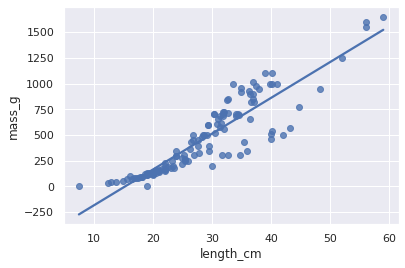

In [13]:
sns.regplot(x="length_cm", y="mass_g", data=fish, ci=None)
plt.show()

## **Incremental dummy**
### **Benchmark = 'Bream'**

In [4]:
mdl_mass_vs_species = ols("mass_g ~ species", data=fish).fit()
mdl_mass_vs_species.params

Intercept           617.829
species[T.Perch]   -235.589
species[T.Pike]     100.877
species[T.Roach]   -465.779
dtype: float64

## **Dummy without intercept**
### **ต้องใส่ + 0 ในสูตร**

species[Bream]   617.829
species[Perch]   382.239
species[Pike]    718.706
species[Roach]   152.050
dtype: float64


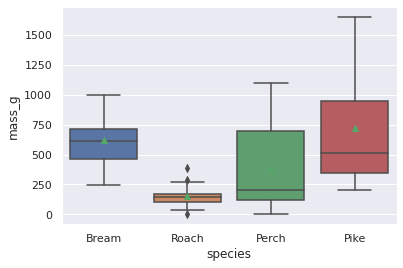

In [5]:
mdl_mass_vs_species = ols("mass_g ~ species + 0", data=fish).fit()
print(mdl_mass_vs_species.params)

sns.boxplot(x="species", y="mass_g", data=fish, showmeans=True)
plt.show()

## **Both numeric variable and dummy**

In [6]:
mdl_mass_vs_both = ols("mass_g ~ length_cm + species + 0", data=fish).fit()
mdl_mass_vs_both.params

species[Bream]     -672.242
species[Perch]     -713.293
species[Pike]    -1,089.456
species[Roach]     -726.778
length_cm            42.569
dtype: float64

# **Visualization: both explanatory variables**

species[Bream]     -672.242
species[Perch]     -713.293
species[Pike]    -1,089.456
species[Roach]     -726.778
length_cm            42.569
dtype: float64


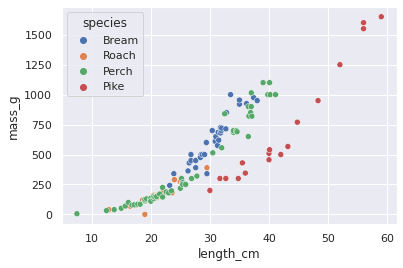

In [15]:
coeffs = mdl_mass_vs_both.params
print(coeffs)
ic_bream, ic_perch, ic_pike, ic_roach, sl = coeffs
sns.scatterplot(x="length_cm", y="mass_g", hue="species", data=fish)
plt.show()

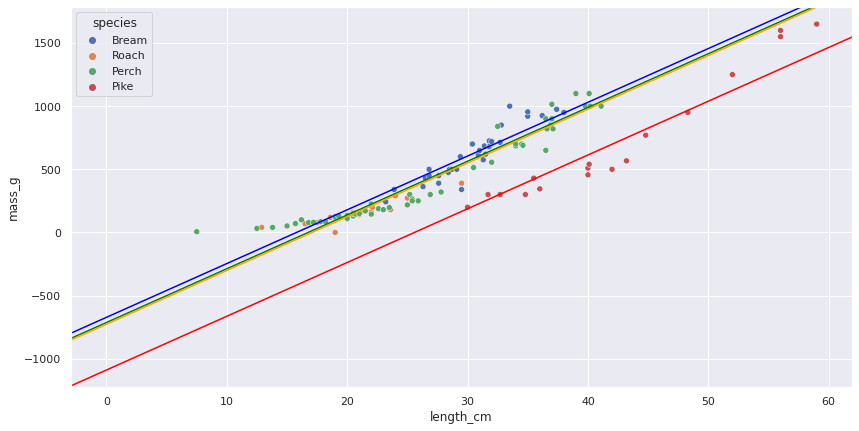

In [14]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x="length_cm", y="mass_g", hue="species", data=fish)
plt.axline(xy1=(0, ic_bream), slope=sl, color="blue")
plt.axline(xy1=(0, ic_perch), slope=sl, color="green")
plt.axline(xy1=(0, ic_pike), slope=sl, color="red")
plt.axline(xy1=(0, ic_roach), slope=sl, color="orange")
plt.show()

### ***Fitting a parallel slopes linear regression***

1. 
* Import **`ols()`** from **`statsmodels.formula.api`**.
* Using the `taiwan_real_estate` dataset, model and fit the house price (in TWD per square meter) versus the number of nearby convenience stores.
* Print the coefficients of the model.

2. 
* Model the house price (in TWD per square meter) versus the house age (in years). *Don't include an intercept term*.
* Print the coefficients of the model.

3. 

* Model the house price versus the number of nearby convenience stores plus the house age. `Don't include an intercept term`.
* Print the coefficients of the model.

In [22]:
from statsmodels.formula.api import ols
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')

# Fit a linear regression of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_conv.params, "\n")    

mdl_price_vs_age = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_age.params, "\n")

mdl_price_vs_both = ols("price_twd_msq ~ n_convenience + house_age_years + 0", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both.params)

Intercept       8.224
n_convenience   0.798
dtype: float64 

house_age_years[0 to 15]    12.637
house_age_years[15 to 30]    9.877
house_age_years[30 to 45]   11.393
dtype: float64 

house_age_years[0 to 15]    9.413
house_age_years[15 to 30]   7.085
house_age_years[30 to 45]   7.511
n_convenience               0.791
dtype: float64


### ***Interpreting parallel slopes coefficients***

For linear regression with a single *categorical* explanatory variable, there is an intercept coefficient for *each* category.

When you have a numeric and a categorical explanatory variable, what do the coefficients mean?

* For each additional nearby convenience store, the expected house price, in TWD per square meter, increases by 0.791.

What is the meaning of the `"0 to 15 years"` coefficient?

* For a house aged 0 to 15 years with *zero* nearby convenience stores, the expected house price is 9.413 TWD per square meter.

The model has one slope coefficient, and three intercept coefficients (one for each possible value of the categorical explanatory variable).

### ***Visualizing each explanatory variable***

To visualize the relationship between a numeric explanatory variable and the numeric response, you can draw a scatter plot with a linear trend line.

To visualize the relationship between a categorical explanatory variable and the numeric response, you can draw a box plot.

1. Using the `taiwan_real_estate` dataset, plot the house price versus the number of nearby convenience stores as a scatter plot with a linear trend line, without a confidence interval ribbon.

2. Using the `taiwan_real_estate` dataset, plot the house price versus the house age as a box plot.

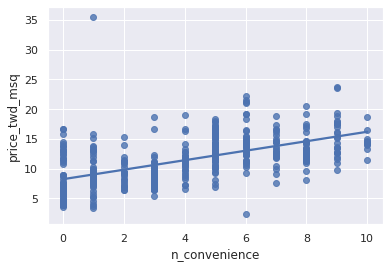

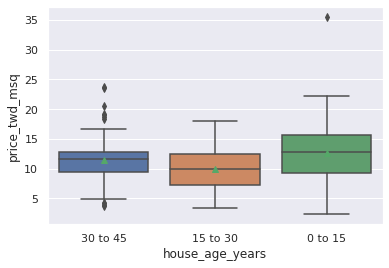

In [23]:
# Create a scatter plot with linear trend line of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, ci=None)

# Show the plot
plt.show()

# Create a boxplot of price_twd_msq vs. house_age_years
sns.boxplot(x='house_age_years', y='price_twd_msq', data=taiwan_real_estate, showmeans=True)

# Show the plot
plt.show()

### ***Visualizing parallel slopes***

The two plots in the previous exercise gave very different predictions: one gave a predicted response that increased linearly with a numeric variable; the other gave a fixed response for each category. The only sensible way to reconcile these two conflicting predictions is to incorporate both explanatory variables in the model at once.

When it comes to a linear regression model with a numeric and a categorical explanatory variable, seaborn doesn't have an easy, "out of the box" way to show the predictions.

* Get the coefficients from `mdl_price_vs_both`, assigning to `coeffs`.
* Assign each of the elements of coeffs to the appropriate variable: `ic_15_30`, `ic_30_45`, `slope`, and `ic_0_15`, in the correct order.
* Create a scatter plot of `price_twd_msq` versus `n_convenience`, colored by `house_age_years`.
* Add three parallel lines, using the intercept and slope for each category of `house_age_years`. Color them `"blue"`, `"orange"`, and `"green"`, respectively.

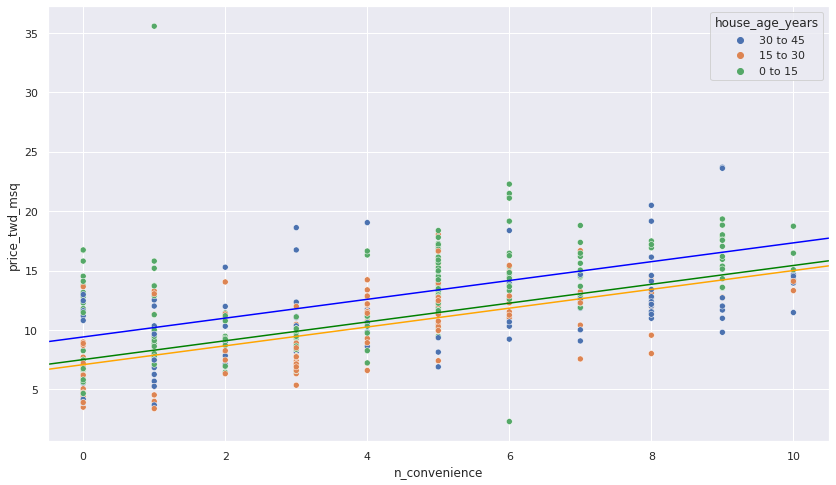

In [25]:
plt.figure(figsize=(14, 8))

# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Draw a scatter plot of price_twd_msq vs. n_convenience, colored by house_age_years
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add three parallel lines for each category of house_age_years
# Color the line for ic_0_15 blue
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")
# Color the line for ic_15_30 orange
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
# Color the line for ic_30_45 green
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")

# Show the plot
plt.show()

The prediction for each category is a slope, and all those slopes are parallel. The plot allows us to see that newer houses are on average more expensive than houses older than 15 years.

# **The prediction workflow - one variable**

In [4]:
expl_data_length = pd.DataFrame({"length_cm": np.arange(5, 61, 5)})
expl_data_length

,length_cm
0,5
1,10
2,15
3,20
4,25
5,30
6,35
7,40
8,45
9,50


# **The prediction workflow (more than one variable)**



```
[A, B, C] x [1, 2] ==> [A1, B1, C1, A2, B2, C2]
```

## **ใช้ itertools ในการสร้าง combination ระหว่างตัวแปรเชิงคุณภาพ**



In [17]:
from itertools import product

for i, j in product(['A', 'B', 'C'], [1, 2]):
    print(i, j)

A 1
A 2
B 1
B 2
C 1
C 2


In [18]:
fish = pd.read_csv('fish.csv')

length_cm = np.arange(5, 61, 5)
species = fish["species"].unique()
p = product(length_cm, species)

expl_data_both = pd.DataFrame(p, columns=['length_cm', 'species'])
expl_data_both

,length_cm,species
0,5,Bream
1,5,Roach
2,5,Perch
3,5,Pike
4,10,Bream
5,10,Roach
6,10,Perch
7,10,Pike
8,15,Bream
9,15,Roach


## **Add predicted columns to the dataframe**

In [12]:
mdl_mass_vs_length = ols("mass_g ~ length_cm", data=fish).fit()

prediction_data_length = expl_data_length.assign(mass_g=mdl_mass_vs_length.predict(expl_data_length))
prediction_data_length

,length_cm,mass_g
0,5,-361.728
1,10,-187.231
2,15,-12.735
3,20,161.761
4,25,336.257
5,30,510.753
6,35,685.250
7,40,859.746
8,45,"1,034.242"
9,50,"1,208.738"


In [19]:
mdl_mass_vs_both = ols("mass_g ~ length_cm + species + 0", data=fish).fit()

prediction_data_both = expl_data_both.assign(mass_g=mdl_mass_vs_both.predict(expl_data_both))
prediction_data_both

,length_cm,species,mass_g
0,5,Bream,-459.399
1,5,Roach,-513.935
2,5,Perch,-500.450
3,5,Pike,-876.613
4,10,Bream,-246.556
5,10,Roach,-301.092
6,10,Perch,-287.607
7,10,Pike,-663.771
8,15,Bream,-33.714
9,15,Roach,-88.249


# **Visualizing the predictions**

ให้สังเกตว่าจุดที่เป็นการ predict จะอยู่บนเส้นเสมอ

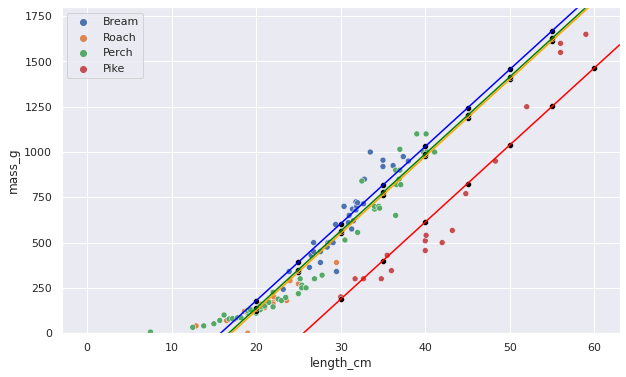

In [20]:
plt.figure(figsize=(10, 6))
mdl_mass_vs_both = ols("mass_g ~ length_cm + species + 0", data=fish).fit()
ic_bream, ic_perch, ic_pike, ic_roach, sl = mdl_mass_vs_both.params

plt.axline(xy1=(0, ic_bream), slope=sl, color="blue")
plt.axline(xy1=(0, ic_perch), slope=sl, color="green")
plt.axline(xy1=(0, ic_pike), slope=sl, color="red")
plt.axline(xy1=(0, ic_roach), slope=sl, color="orange")

sns.scatterplot(x="length_cm", y="mass_g", hue="species", data=fish)
sns.scatterplot(x="length_cm", y="mass_g", color="black", data=prediction_data_both)
plt.ylim([-1, 1800])
plt.show()

# **Manually calculating predictions for multiple regression**

In [20]:
coeffs = mdl_mass_vs_both.params
print(coeffs)
ic_bream, ic_perch, ic_pike, ic_roach, slope = coeffs

species[Bream]     -672.242
species[Perch]     -713.293
species[Pike]    -1,089.456
species[Roach]     -726.778
length_cm            42.569
dtype: float64


# **`np.select()`**

* ดูเงื่อนไขเรียงตามทีละอันจากบนลงล่าง (หรือซ้ายไปขวา)
* ถ้าเงื่อนไขแรกเป็นจริง ใส่ `ic_bream`
* ถ้าเงื่อนไขแรกเป็นจริง ใส่ `ic_roach` ...

In [25]:
explanatory_data = expl_data_both.copy()

display(explanatory_data.head(9))

conditions = [explanatory_data["species"] == "Bream",
              explanatory_data["species"] == "Roach",
              explanatory_data["species"] == "Perch",
              explanatory_data["species"] == "Pike"]

choices = [ic_bream, ic_roach, ic_perch, ic_pike]
intercept = np.select(conditions, choices)
intercept 

,length_cm,species
0,5,Bream
1,5,Roach
2,5,Perch
3,5,Pike
4,10,Bream
5,10,Roach
6,10,Perch
7,10,Pike
8,15,Bream


array([ -672.24,  -726.78,  -713.29, -1089.46,
        -672.24,  -726.78,  -713.29, -1089.46,
        -672.24,  -726.78,  -713.29, -1089.46,
        -672.24,  -726.78,  -713.29, -1089.46,
        -672.24,  -726.78,  -713.29, -1089.46,
        -672.24,  -726.78,  -713.29, -1089.46,
        -672.24,  -726.78,  -713.29, -1089.46,
        -672.24,  -726.78,  -713.29, -1089.46,
        -672.24,  -726.78,  -713.29, -1089.46,
        -672.24,  -726.78,  -713.29, -1089.46,
        -672.24,  -726.78,  -713.29, -1089.46,
        -672.24,  -726.78,  -713.29, -1089.46])

In [26]:
prediction_data = explanatory_data.assign(intercept=np.select(conditions, choices), mass_g=intercept + slope*explanatory_data["length_cm"])
prediction_data

,length_cm,species,intercept,mass_g
0,5,Bream,-672.242,-459.399
1,5,Roach,-726.778,-513.935
2,5,Perch,-713.293,-500.450
3,5,Pike,"-1,089.456",-876.613
4,10,Bream,-672.242,-246.556
5,10,Roach,-726.778,-301.092
6,10,Perch,-713.293,-287.607
7,10,Pike,"-1,089.456",-663.771
8,15,Bream,-672.242,-33.714
9,15,Roach,-726.778,-88.249


### ***Predicting with a parallel slopes model***

The workflow has two steps: create a DataFrame of explanatory variables, then add a column of predictions.

* Create `n_convenience` as an array of numbers from `0` to `10`.
* Extract the unique values of the `house_age_years` column of `taiwan_real_estate` into the array `house_age_years`.
* Create `p`, which should contain the Cartesian product of all values of `n_convenience` and `house_age_years`.
* Transform `p` to a DataFrame and name the columns `"n_convenience"` and `"house_age_years"`

In [27]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
mdl_price_vs_both = ols("price_twd_msq ~ n_convenience + house_age_years + 0", data=taiwan_real_estate).fit()

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate['house_age_years'].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(data=p, columns=['n_convenience', 'house_age_years'])
explanatory_data

,n_convenience,house_age_years
0,0,30 to 45
1,0,15 to 30
2,0,0 to 15
3,1,30 to 45
4,1,15 to 30
5,1,0 to 15
6,2,30 to 45
7,2,15 to 30
8,2,0 to 15
9,3,30 to 45


* Add a column to `explanatory_data` named `price_twd_msq` containing the predictions made using `mdl_price_vs_both` and `explanatory_data`. Assign the result to `prediction_data`.

In [29]:
# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(price_twd_msq=mdl_price_vs_both.predict(explanatory_data))

prediction_data

,n_convenience,house_age_years,price_twd_msq
0,0,30 to 45,7.511
1,0,15 to 30,7.085
2,0,0 to 15,9.413
3,1,30 to 45,8.302
4,1,15 to 30,7.877
5,1,0 to 15,10.205
6,2,30 to 45,9.094
7,2,15 to 30,8.668
8,2,0 to 15,10.996
9,3,30 to 45,9.885


### ***Visualizing parallel slopes model predictions***

* Get the coefficients from `mdl_price_vs_both`, assigning to `coeffs`.
* Look at `coeffs` and see which coefficient corresponds to which element.
* Assign each of the elements of `coeffs` to the appropriate variable: `ic_15_30`, `ic_30_45`, `slope`, and `ic_0_15`, in the right order.
* Add the predictions as black points on the scatter plot.

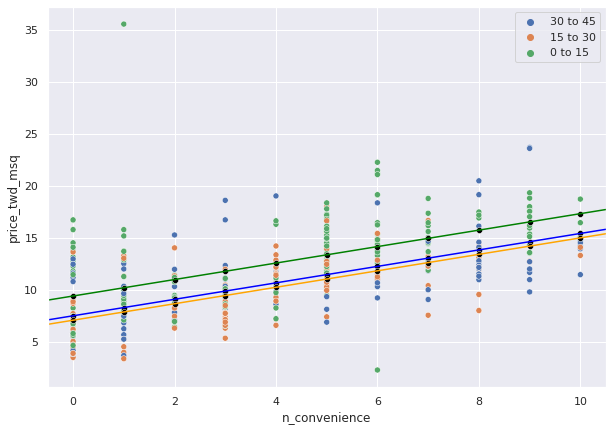

In [34]:
plt.figure(figsize=(10, 7))
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Create the parallel slopes plot
plt.axline(xy1=(0, ic_0_15), slope=slope, color="green")
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
plt.axline(xy1=(0, ic_30_45), slope=slope, color="blue")
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add the predictions in black
sns.scatterplot(x='n_convenience', y='price_twd_msq', color='black', data=prediction_data)
plt.show()

### **Manually calculating predictions**

* Define a list, `conditions`, with three conditional statements: `house_age_years` is `"0 to 15"`, `house_age_years` is `"15 to 30"`, and `house_age_years` is `"30 to 45"`.

* Define a list, `choices`, with the extracted intercepts from `mdl_price_vs_both`. These correspond to each of the conditions.

* Create an array of intercepts using **`np.select()`**.

* Create `prediction_data`: start with `explanatory_data`, assign `intercept` as the array of intercepts, and `price_twd_msq` as the manually calculated predictions.

In [37]:
# Define conditions
conditions = [explanatory_data['house_age_years'] == '0 to 15',
              explanatory_data['house_age_years'] == '15 to 30',
              explanatory_data['house_age_years'] == '30 to 45']

# Define choices
choices = [ic_0_15, ic_15_30, ic_30_45]

# Create array of intercepts for each house_age_year category
intercept = np.select(conditions, choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(intercept=intercept,
                                          price_twd_msq=intercept + slope * explanatory_data['n_convenience'])

prediction_data

,n_convenience,house_age_years,intercept,price_twd_msq
0,0,30 to 45,7.511,7.511
1,0,15 to 30,7.085,7.085
2,0,0 to 15,9.413,9.413
3,1,30 to 45,7.511,8.302
4,1,15 to 30,7.085,7.877
5,1,0 to 15,9.413,10.205
6,2,30 to 45,7.511,9.094
7,2,15 to 30,7.085,8.668
8,2,0 to 15,9.413,10.996
9,3,30 to 45,7.511,9.885


# **Getting the coefficient of determination $(R^2)$: `.rsquared`**

In [7]:
fish = pd.read_csv('fish.csv')
mdl_mass_vs_length = ols("mass_g ~ length_cm", data=fish).fit()
mdl_mass_vs_species = ols("mass_g ~ species + 0", data=fish).fit()
mdl_mass_vs_both = ols("mass_g ~ length_cm + species + 0", data=fish).fit()

mdl_mass_vs_length.rsquared

0.8225689502644215

In [8]:
mdl_mass_vs_species.rsquared

0.25814887709499146

In [9]:
mdl_mass_vs_both.rsquared

0.9200433561156649

# **Adjusted ($R^2$): `.rsquared_adj`**

$$\bar{R}^2 = 1 - (1-R^2)\frac{n_{obs}-1}{n_{obs} - n_{variables}-1}$$

In [11]:
print("rsq_both: ", mdl_mass_vs_both.rsquared)
print("rsq_adj_both: ", mdl_mass_vs_both.rsquared_adj)

rsq_both:  0.9200433561156649
rsq_adj_both:  0.9174431400543857


# **residual standard error: `.mse_resid`**

In [12]:
np.sqrt(mdl_mass_vs_both.mse_resid)

103.3556330396649

# **Run model for each separate category**

<Figure size 1080x432 with 0 Axes>

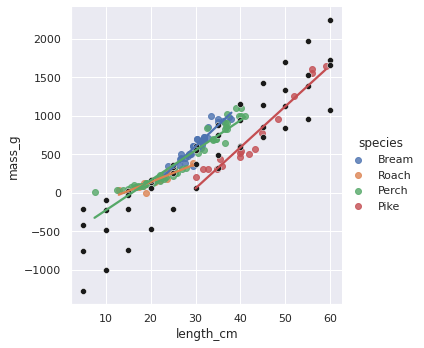

In [15]:
bream = fish[fish["species"] == "Bream"]
perch = fish[fish["species"] == "Perch"]
pike = fish[fish["species"] == "Pike"]
roach = fish[fish["species"] == "Roach"]

mdl_bream = ols("mass_g ~ length_cm", data=bream).fit()
mdl_perch = ols("mass_g ~ length_cm", data=perch).fit()
mdl_pike = ols("mass_g ~ length_cm", data=pike).fit()
mdl_roach = ols("mass_g ~ length_cm", data=roach).fit()

explanatory_data = pd.DataFrame({"length_cm": np.arange(5, 61, 5)})

prediction_data_bream = explanatory_data.assign(mass_g = mdl_bream.predict(explanatory_data), species = "Bream")
prediction_data_perch = explanatory_data.assign(mass_g = mdl_perch.predict(explanatory_data), species = "Perch")
prediction_data_pike = explanatory_data.assign(mass_g = mdl_pike.predict(explanatory_data), species = "Pike")
prediction_data_roach = explanatory_data.assign(mass_g = mdl_roach.predict(explanatory_data), species = "Roach")

prediction_data = pd.concat([prediction_data_bream, prediction_data_roach, prediction_data_perch, prediction_data_pike]) 

sns.lmplot(x="length_cm", y="mass_g", data=fish, hue="species", ci=None)
sns.scatterplot(x="length_cm", y="mass_g", data=prediction_data, color='k', ci=None, legend=False)
plt.show()

จะเห็นว่า จุดที่มาจาก prediction จะต้องอยู่บนเส้น fitted value ของ **`lmplot `**

### **One model with an interaction**

In [43]:
fish = pd.read_csv('fish.csv')
# mdl_mass_vs_both_inter = ols("mass_g ~ species + length_cm + species:length_cm + 0", data=fish).fit()
# mdl_mass_vs_both_inter = ols("mass_g ~ species + length_cm + species*length_cm + 0", data=fish).fit()
mdl_mass_vs_both_inter = ols("mass_g ~ species + species:length_cm + 0", data=fish).fit()
# mdl_mass_vs_both_inter = ols("mass_g ~ species*length_cm + 0", data=fish).fit() 
mdl_mass_vs_both_inter.params

species[Bream]             -1,035.348
species[Perch]               -619.175
species[Pike]              -1,540.824
species[Roach]               -329.376
species[Bream]:length_cm       54.550
species[Perch]:length_cm       38.911
species[Pike]:length_cm        53.195
species[Roach]:length_cm       23.319
dtype: float64

In [31]:
print(mdl_bream.params, "\n")
print(mdl_perch.params, "\n")
print(mdl_pike.params, "\n")
print(mdl_roach.params)

Intercept   -1,035.348
length_cm       54.550
dtype: float64 

Intercept   -619.175
length_cm     38.911
dtype: float64 

Intercept   -1,540.824
length_cm       53.195
dtype: float64 

Intercept   -329.376
length_cm     23.319
dtype: float64


* ให้สังเกตว่า ค่าสัมประสิทธิ์ของจุดตัดเหมือนกันกับตอนรันแยก แต่ความชันจะต้องเอามาบวกลบกันอีกที

* ตรงผลลัพธ์ ถ้าสัมประสิทธิ์มีตัว T. อยู่ แปลว่า การคำนวณค่านั้นต้องเอามาบวกลบก่อน

In [2]:
fish = pd.read_csv('fish.csv')
mdl_mass_vs_both_inter = ols("mass_g ~ species + species:length_cm + 0", data=fish).fit()
mdl_mass_vs_both_inter.params

species[Bream]             -1,035.348
species[Perch]               -619.175
species[Pike]              -1,540.824
species[Roach]               -329.376
species[Bream]:length_cm       54.550
species[Perch]:length_cm       38.911
species[Pike]:length_cm        53.195
species[Roach]:length_cm       23.319
dtype: float64

# **Predictions with interactions**

In [4]:
from itertools import product

length_cm = np.arange(5, 61, 5)
species = fish["species"].unique()
p = product(length_cm, species)

explanatory_data = pd.DataFrame(p, columns=["length_cm", "species"])
prediction_data = explanatory_data.assign(mass_g = mdl_mass_vs_both_inter.predict(explanatory_data))
prediction_data

,length_cm,species,mass_g
0,5,Bream,-762.598
1,5,Roach,-212.780
2,5,Perch,-424.618
3,5,Pike,"-1,274.850"
4,10,Bream,-489.848
5,10,Roach,-96.184
6,10,Perch,-230.060
7,10,Pike,"-1,008.876"
8,15,Bream,-217.098
9,15,Roach,20.413


# **Visualizing the predictions**

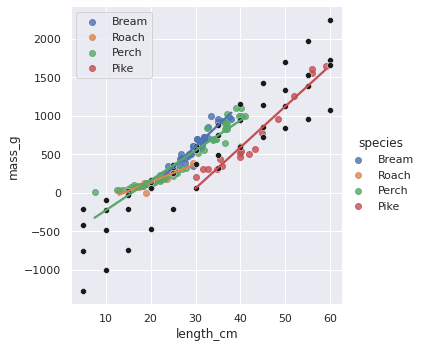

In [5]:
sns.lmplot(x="length_cm", y="mass_g", data=fish, hue="species", ci=None)
sns.scatterplot(x="length_cm", y="mass_g", data=prediction_data, color='k')
plt.show()

# **Manually calculating the predictions**

In [7]:
coeffs = mdl_mass_vs_both_inter.params
coeffs

species[Bream]             -1,035.348
species[Perch]               -619.175
species[Pike]              -1,540.824
species[Roach]               -329.376
species[Bream]:length_cm       54.550
species[Perch]:length_cm       38.911
species[Pike]:length_cm        53.195
species[Roach]:length_cm       23.319
dtype: float64

In [8]:
ic_bream, ic_perch, ic_pike, ic_roach, slope_bream, slope_perch, slope_pike, slope_roach = coeffs

conditions = [explanatory_data["species"] == "Bream", 
              explanatory_data["species"] == "Perch",
              explanatory_data["species"] == "Pike",
              explanatory_data["species"] == "Roach"]

ic_choices = [ic_bream, ic_perch, ic_pike, ic_roach]
intercept = np.select(conditions, ic_choices)

slope_choices = [slope_bream, slope_perch, slope_pike, slope_roach]
slope = np.select(conditions, slope_choices)

prediction_data = explanatory_data.assign(mass_g = intercept + slope * explanatory_data["length_cm"])
prediction_data

,length_cm,species,mass_g
0,5,Bream,-762.598
1,5,Roach,-212.780
2,5,Perch,-424.618
3,5,Pike,"-1,274.850"
4,10,Bream,-489.848
5,10,Roach,-96.184
6,10,Perch,-230.060
7,10,Pike,"-1,008.876"
8,15,Bream,-217.098
9,15,Roach,20.413


# **Simpson's Paradox**

* ผลรันกับข้อมูลทั้งหมด แตกต่างกับผลรันจากข้อมูลแยกเป็นกลุ่มๆอย่างมาก
* เช่น ความชันของข้อมูลทั้งหมดเป็นบวก พอเอามารันแยกเป็นกลุ่มความชันกลับติดลบ

### ***Modeling eBay auctions***

```
variable	     meaning
price	        Final sale price, USD
openbid	      The opening bid, USD
auction_type	 How long did the auction last?
```

* Fit a linear regression model of `price` versus `openbid`, using the `auctions` dataset. Look at the *coefficients*.

In [2]:
auctions = pd.read_csv('auctions.csv')
auctions.info()
display(auctions.head())

# Model price vs. opening bid using auctions
mdl_price_vs_openbid = ols('price ~ openbid', data=auctions).fit()
mdl_price_vs_openbid.params

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         343 non-null    float64
 1   openbid       343 non-null    float64
 2   auction_type  343 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.2+ KB


,price,openbid,auction_type
0,260.000,0.010,7 day auction
1,256.860,0.010,3 day auction
2,260.000,0.010,5 day auction
3,238.020,0.010,7 day auction
4,231.500,1.000,7 day auction


Intercept   229.246
openbid      -0.002
dtype: float64

* Using auctions, plot `price` versus `openbid` as a scatter plot with linear regression trend lines (without confidence interval). *Look at the trend line*.

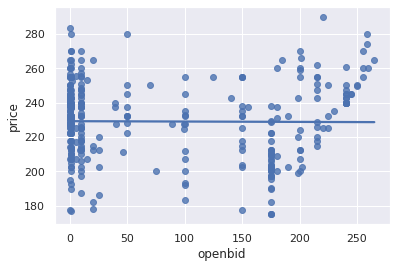

In [4]:
sns.regplot(x='openbid', y='price', data=auctions, ci=None)
plt.show()

 The slope coefficient is small enough that it might as well be zero. That is, opening bid appears to have no effect on the final sale price for Palm Pilots.

### ***Modeling each auction type***

You just saw that the opening bid price appeared not to affect the final sale price of Palm Pilots in the eBay auctions. Now let's look at what happens when you model the three auction types (3 day, 5 day, and 7 day) separately.

* Fit a linear regression model of `price` versus `openbid` and `auction_type`, with an interaction between the explanatory variables, without a global intercept term, and using the `auctions` dataset. `Look at the coefficients`.

In [5]:
# Fit linear regression of price vs. opening bid and auction type, with an interaction, without intercept
mdl_price_vs_both = ols('price ~ auction_type + auction_type:openbid + 0', data=auctions).fit()

# See the result
print(mdl_price_vs_both.params)

auction_type[3 day auction]           226.369
auction_type[5 day auction]           221.599
auction_type[7 day auction]           231.603
auction_type[3 day auction]:openbid    -0.029
auction_type[5 day auction]:openbid     0.084
auction_type[7 day auction]:openbid     0.004
dtype: float64


* Using `auctions`, plot `price` versus `openbid`, colored by `auction_type`, as a scatter plot with linear regression trend lines (without confidence interval). *Look at the trend lines*.

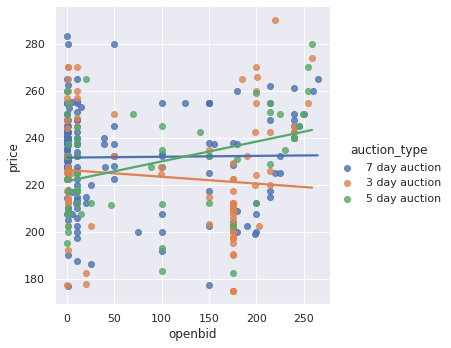

In [6]:
sns.lmplot(x='openbid', y='price', data=auctions, ci=None, hue='auction_type')
plt.show()

The two models disagree, and the best model to take advice from depends upon the question we are trying to solve.

### ***Visualizing three numeric variables***

There are also some "flat" alternatives to 3D plots that provide easier interpretation, though they require a little thinking about to make. A good approach is plotting the two numeric explanatory variables on the x- and y-axis of a scatter plot, and coloring the points according to the response variable.

* Calculate the square-root of the distance to the nearest MRT stop as `sqrt_dist_to_mrt_m`.
* With the `taiwan_real_estate` dataset, draw a scatter plot of `sqrt_dist_to_mrt_m` versus the number of nearby convenience stores, colored by house price.

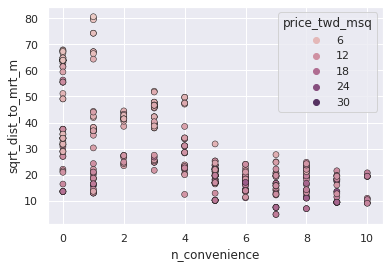

In [11]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])

# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience colored by price_twd_msq
sns.scatterplot(y='sqrt_dist_to_mrt_m', x='n_convenience', data=taiwan_real_estate, hue='price_twd_msq', edgecolor='k')

# Show the plot
plt.show()

* The plot suggests that prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short.

*  There tend to be more convenience stores when the nearest MRT station is close.

### ***Modeling two numeric explanatory variables***

* Fit a linear regression of house price versus the number of convenience stores and the square-root of the distance to the nearest MRT stations, without an interaction, using the `taiwan_real_estate` dataset

* Create a DataFrame `explanatory_data` of explanatory variables with number of convenience stores from `0` to `10` and the distance to the nearest MRT station as a sequence from `0` to `80` in steps of `10`. Name the columns `"n_convenience"` and `"sqrt_dist_to_mrt_m"`.

* Add a column of predictions (`price_twd_msq`) to `explanatory_data` using `mdl_price_vs_conv_dist` and `explanatory_data`. Assign to `prediction_data`.

In [12]:
# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt_m + n_convenience', data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_conv_dist.params)

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = product(n_convenience, sqrt_dist_to_mrt_m)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'sqrt_dist_to_mrt_m'])

# Add column of predictions
prediction_data = explanatory_data.assign(price_twd_msq=mdl_price_vs_conv_dist.predict(explanatory_data))

# See the result  
prediction_data

Intercept            15.104
sqrt_dist_to_mrt_m   -0.157
n_convenience         0.214
dtype: float64


,n_convenience,sqrt_dist_to_mrt_m,price_twd_msq
0,0,0,15.104
1,0,10,13.531
2,0,20,11.958
3,0,30,10.385
4,0,40,8.812
...,...,...,...
94,10,40,10.954
95,10,50,9.381
96,10,60,7.808
97,10,70,6.235


### ***Visualizing two numeric explanatory variables***

* Using `taiwan_real_estate`, create a scatter plot of `sqrt_dist_to_mrt_m` versus `n_convenience`, colored by `price_twd_msq`.

* Create an additional scatter plot of `prediction_data`, without a legend, and with marker set to `"s"` (for squares).

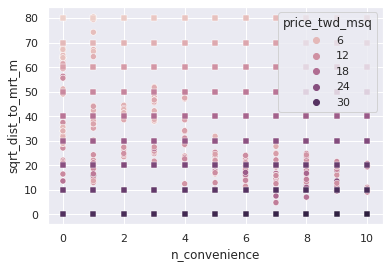

In [13]:
# Create scatter plot of taiwan_real_estate
sns.scatterplot(y='sqrt_dist_to_mrt_m', x='n_convenience', hue='price_twd_msq', data=taiwan_real_estate)

# Create scatter plot of prediction_data without legend
sns.scatterplot(y='sqrt_dist_to_mrt_m', x='n_convenience', hue='price_twd_msq', legend=False, marker='s', data=prediction_data)

# Show the plot
plt.show()

Prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short.

### ***Including an interaction***

Just as in the case with one numeric and one categorical explanatory variable, it is possible for numeric explanatory variables to interact. With this model structure, you'll get a third slope coefficient: one for each explanatory variable and one for the interaction.

Here, you'll run, predict, and plot the same model as in the previous exercise, but this time including an interaction between the explanatory variables.

* Change the name of the model to` mdl_price_vs_conv_dist_inter`.
* Adapt the rest of the code from the previous exercise to include an interaction.

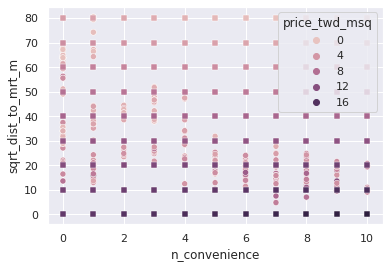

In [14]:
# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])

prediction_data = explanatory_data.assign(
    price_twd_msq=mdl_price_vs_conv_dist_inter.predict(explanatory_data))

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)
sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")
plt.show()

Although the predictions from the model are different now that the interaction is included, the code to create them is the same. The resulting prediction grid is not much different from the model without an interaction.

### ***Visualizing many variables: `sns.FacetGrid`***

* Create a facet grid for each `house_age_years` in `taiwan_real_estate`.
* Using the` taiwan_real_estate` dataset, draw a scatter plot of `n_convenience` versus `sqrt_dist_to_mrt_m`, colored by `price_twd_msq`.

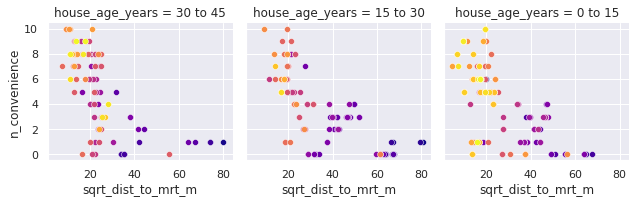

In [15]:
# Prepare the grid using taiwan_real_estate, for each house age category, colored by price_twd_msq
grid = sns.FacetGrid(data=taiwan_real_estate,
            col='house_age_years',
            hue='price_twd_msq',
            palette="plasma")

# Plot the scatterplots with sqrt_dist_to_mrt_m on the x-axis and n_convenience on the y-axis
grid.map(sns.scatterplot,
         'sqrt_dist_to_mrt_m',
         'n_convenience')

# Show the plot (brighter colors mean higher prices)
plt.show()

House price increases with shorter distances to the nearest MRT station, and increases with the number of nearby convenience stores. Faceting by house age suggests that this effect is similar for all house age groups. As you add more variables, it becomes increasingly challenging to create an easily interpretable plot.

### ***Different levels of interaction***

* Fit a linear regression of house price versus `n_convenience`, `sqrt_dist_to_mrt_m`, and `house_age_years`. Don't include a global intercept, and don't include any interactions.

In [16]:
# Model price vs. no. of conv. stores, sqrt dist. to MRT station & house age, no global intercept, no interactions
mdl_price_vs_all_no_inter = ols('price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + house_age_years + 0', data=taiwan_real_estate).fit()
# See the result
print(mdl_price_vs_all_no_inter.params)

house_age_years[0 to 15]    15.474
house_age_years[15 to 30]   14.130
house_age_years[30 to 45]   13.765
n_convenience                0.258
sqrt_dist_to_mrt_m          -0.148
dtype: float64


* Fit a linear regression of house price versus `n_convenience`, `sqrt_dist_to_mrt_m`, and `house_age_years`. Don't include a global intercept, but do include 2-way and 3-way interactions between the explanatory variables.

In [17]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter = ols('price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m * house_age_years + 0', data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_3_way_inter.params)

house_age_years[0 to 15]                                       16.047
house_age_years[15 to 30]                                      13.760
house_age_years[30 to 45]                                      12.089
n_convenience                                                   0.375
n_convenience:house_age_years[T.15 to 30]                       0.078
n_convenience:house_age_years[T.30 to 45]                       0.067
sqrt_dist_to_mrt_m                                             -0.163
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]                  0.037
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]                  0.061
n_convenience:sqrt_dist_to_mrt_m                               -0.008
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]   -0.004
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]    0.004
dtype: float64


* Fit a linear regression of house price versus `n_convenience`, `sqrt_dist_to_mrt_m`, and `house_age_years`. Don't include a global intercept, but do include 2-way (not 3-way) interactions between the explanatory variables.

In [18]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 2-way interactions
mdl_price_vs_all_2_way_inter = ols('price_twd_msq ~ (n_convenience + sqrt_dist_to_mrt_m + house_age_years) ** 2 + 0', data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_2_way_inter.params)

house_age_years[0 to 15]                         16.027
house_age_years[15 to 30]                        13.881
house_age_years[30 to 45]                        11.927
n_convenience                                     0.385
n_convenience:house_age_years[T.15 to 30]        -0.007
n_convenience:house_age_years[T.30 to 45]         0.143
sqrt_dist_to_mrt_m                               -0.162
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]    0.032
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]    0.068
n_convenience:sqrt_dist_to_mrt_m                 -0.009
dtype: float64


### ***Predicting again***

Create `explanatory_data`, formed from combinations of the following variables, in this order:

* `n_convenience` should take the numbers zero to ten.
* `sqrt_dist_to_mrt_m` should take a sequence from zero to eighty in steps of ten.
* `house_age_years` should take the unique values of the `house_age_years` column of `taiwan_real_estate`.

In [20]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate['house_age_years'].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'sqrt_dist_to_mrt_m', 'house_age_years'])

# See the result
explanatory_data

,n_convenience,sqrt_dist_to_mrt_m,house_age_years
0,0,0,30 to 45
1,0,0,15 to 30
2,0,0,0 to 15
3,0,10,30 to 45
4,0,10,15 to 30
...,...,...,...
292,10,70,15 to 30
293,10,70,0 to 15
294,10,80,30 to 45
295,10,80,15 to 30


* Add a column to the `explanatory_data`, assigning to `prediction_data`.
* The column should be named after the response variable, and contain predictions made using `mdl_price_vs_all_3_way_inter` and `explanatory_data`.

In [21]:
# Add column of predictions
prediction_data =explanatory_data.assign(price_twd_msq=mdl_price_vs_all_3_way_inter.predict(explanatory_data))

# See the result
prediction_data

,n_convenience,sqrt_dist_to_mrt_m,house_age_years,price_twd_msq
0,0,0,30 to 45,12.089
1,0,0,15 to 30,13.760
2,0,0,0 to 15,16.047
3,0,10,30 to 45,11.072
4,0,10,15 to 30,12.497
...,...,...,...,...
292,10,70,15 to 30,0.901
293,10,70,0 to 15,2.516
294,10,80,30 to 45,5.179
295,10,80,15 to 30,-1.584


### ***Linear regression algorithm***

To truly understand linear regression, it is helpful to know how the algorithm works. The code for **`ols()`** is hundreds of lines because it has to work with any formula and any dataset. However, in the case of simple linear regression for a single dataset, you can implement a linear regression algorithm in just a few lines of code.

The workflow is:

* First, write a function to calculate the sum of squares using this general syntax:

```
def function_name(args):
  # some calculations with the args
  return outcome
```

* Second, use **`scipy`**'s **`minimize`** function find the coefficients that minimize this function.


* Unpack `coeffs` to `intercept` and `slope`, respectively.
* Calculate the predicted y-values as the intercept plus the slope times the actual x-values.
* Calculate the differences between actual and predicted y-values.
* Calculate the sum of squares: square the differences in y-values and take the sum.
* Return the sum of squares.

In [22]:
from scipy.optimize import minimize

x_actual, y_actual = taiwan_real_estate['n_convenience'], taiwan_real_estate['price_twd_msq']

# Complete the function
def calc_sum_of_squares(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = intercept + slope * x_actual
    # Calculate differences between y_actual and y_pred
    y_diff = y_pred - y_actual
    # Calculate sum of squares
    sum_sq = np.sum(y_diff ** 2)
    # Return sum of squares
    return sum_sq

# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_sum_of_squares,
               x0=[0, 0]))

# Compare the output with the ols() call.
print(ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit().params)
  

      fun: 4717.68623992569
 hess_inv: array([[ 0., -0.],
       [-0.,  0.]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([8.22, 0.8 ])
Intercept       8.224
n_convenience   0.798
dtype: float64


 The results you got here with just a few lines of code are identical to the finely-tuned results from **`ols()`**. All you needed was a function to calculate the sum of squares metric, and the**` minimize()`** function worked its magic to find where this function had its minimum value.

 ## ***Logistic regression with two explanatory variables***

 Fit a logistic regression of churn status, `has_churned`, versus length of customer relationship, `time_since_first_purchase`, and recency of purchase, `time_since_last_purchase`, and an interaction between the explanatory variables.

In [2]:
churn = pd.read_csv('churn.csv')

# Fit a logistic regression of churn status vs. length of relationship, recency, and an interaction
mdl_churn_vs_both_inter = logit('has_churned ~ time_since_first_purchase * time_since_last_purchase', data=churn).fit()

# Print the coefficients
print(mdl_churn_vs_both_inter.params)

Optimization terminated successfully.
         Current function value: 0.649717
         Iterations 5
Intercept                                            -0.151
time_since_first_purchase                            -0.638
time_since_last_purchase                              0.423
time_since_first_purchase:time_since_last_purchase    0.112
dtype: float64


## **Logistic regression prediction**

Create a DataFrame `explanatory_data` of all combinations of these explanatory variables:

* Set `time_since_first_purchase` to a sequence from minus two to four in steps of `0.1`.

* Set `time_since_last_purchase` to a sequence from minus one to six in steps of `0.1`.

Name the columns of `explanatory_data` as `"time_since_first_purchase"` and `"time_since_last_purchase"`.

In [3]:
# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.01, 0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.01, 0.1)

# Create p as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['time_since_first_purchase', 'time_since_last_purchase'])

# Print the result
explanatory_data

,time_since_first_purchase,time_since_last_purchase
0,-2.000,-1.000
1,-2.000,-0.900
2,-2.000,-0.800
3,-2.000,-0.700
4,-2.000,-0.600
...,...,...
4326,4.000,5.600
4327,4.000,5.700
4328,4.000,5.800
4329,4.000,5.900


* Add a column to `explanatory_data` named `has_churned` containing predictions using `mdl_churn_vs_both_inter` and `explanatory_data`, and assign to `prediction_data`.

* Update `prediction_data` to add a column of the most likely churn outcome, `most_likely_outcome`.

In [4]:
# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.1, 0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.1, 0.1)

# Create p as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["time_since_first_purchase",
                                            "time_since_last_purchase"])

# Create prediction_data
prediction_data = explanatory_data.assign(has_churned=mdl_churn_vs_both_inter.predict(explanatory_data))

# Create most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data['has_churned'])

# See the result
prediction_data

,time_since_first_purchase,time_since_last_purchase,has_churned,most_likely_outcome
0,-2.000,-1.000,0.716,1.000
1,-2.000,-0.900,0.720,1.000
2,-2.000,-0.800,0.724,1.000
3,-2.000,-0.700,0.728,1.000
4,-2.000,-0.600,0.732,1.000
...,...,...,...,...
4326,4.000,5.600,0.899,1.000
4327,4.000,5.700,0.906,1.000
4328,4.000,5.800,0.914,1.000
4329,4.000,5.900,0.920,1.000


## ***Visualizing multiple explanatory variables***

* Using the `churn` dataset, plot the recency of purchase, `time_since_last_purchase`, versus the length of customer relationship, `time_since_first_purchase`, colored by whether or not the customer churned, `has_churned`.

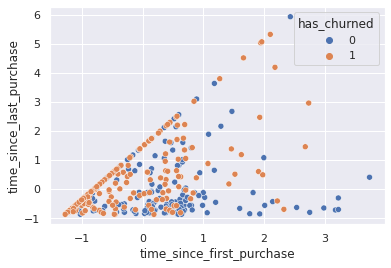

In [5]:
sns.scatterplot(x='time_since_first_purchase', y='time_since_last_purchase', data=churn,hue='has_churned')
plt.show()

* Using the `prediction_data` dataset, plot the recency of purchase, `time_since_last_purchase`, versus the length of customer relationship, `time_since_first_purchase`, colored by the most likely churn outcome, `most_likely_outcome`.

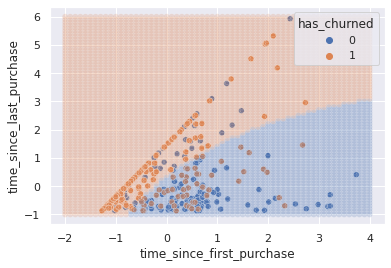

In [6]:
# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn, 
                hue="has_churned")

# Using prediction_data, plot recency vs. length of relationship, colored by most_likely_outcome
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=prediction_data, hue='most_likely_outcome', alpha=0.2, legend=False)

# Show the plot
plt.show()

The reason why the data points lie on or to the right of the diagonal line is due to nature of the data: the time since the last purchase can't exceed the time since the first purchase. Also notice the pattern of the prediction data: longer customer relationships and shorter purchase recency predicts lower churns.

### ***Confusion matrix***

When the response variable has just two outcomes, like the case of churn, the measures of success for the model are "how many cases where the customer churned did the model correctly predict?" and "how many cases where the customer didn't churn did the model correctly predict?". These can be found by generating a confusion matrix and calculating summary metrics on it.

Recall the following definitions:

*Accuracy*  is the proportion of predictions that are correct.

$$
\text{accuracy} = \frac{TN + TP}{TN + FN + FP + TP}
$$
 
*Sensitivity* (หรือ Recall) is the proportion of true observations that are correctly predicted by the model as being true.

$$
\text{sensitivity} = \frac{TP}{TP + FN}
$$

*Specificity* is the proportion of false observations that are correctly predicted by the model as being false.

$$
\text{specificity} = \frac{TN}{TN + FP}
$$

* Create the confusion matrix, `conf_matrix`.

* Extract the number of true positives (`TP`), true negatives (`TN`), false positives (`FP`), and false negatives (`FN`) from `conf_matrix`.

* Calculate the `accuracy` of the model.
* Calculate the `sensitivity` of the model.
* Calculate the `specificity` of the model.

In [7]:
# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()

# Print it
print(conf_matrix)

# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()

# Extract TN, TP, FN and FP from conf_matrix
TN = 102
TP = 147
FN = 53
FP = 98

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("accuracy", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity", specificity)

[[102.  98.]
 [ 53. 147.]]
accuracy 0.6225
sensitivity 0.735
specificity 0.51


There is often a trade-off between sensitivity and specificity.

# **Gaussian pdf**

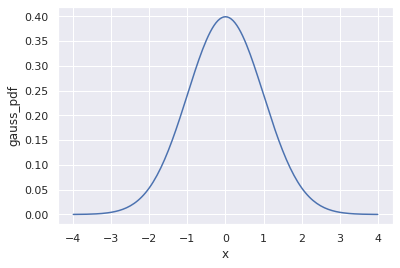

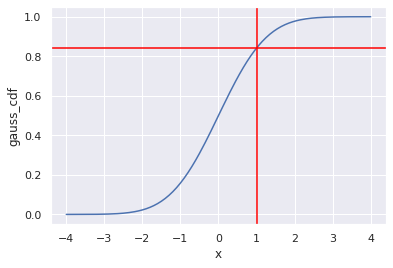

In [12]:
from scipy.stats import norm

x = np.arange(-4, 4.05, 0.05)

gauss_dist = pd.DataFrame({"x": x, "gauss_pdf": norm.pdf(x), "gauss_cdf": norm.cdf(x)})
sns.lineplot(x="x", y="gauss_pdf", data=gauss_dist)
plt.show()

sns.lineplot(x="x", y="gauss_cdf", data=gauss_dist)
plt.axvline(x=1, color='red')
plt.axhline(y=0.84, color='red')
plt.show()

จาก cdf หมายถึงว่า ค่า $x$ ที่ต่ำกว่า 1 มีอยู่ 84%

# **Gaussian inverse CDF**



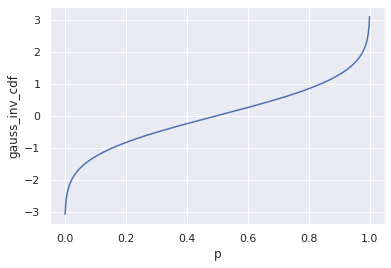

In [13]:
p = np.arange(0.001, 1, 0.001)

gauss_dist_inv = pd.DataFrame({"p": p, "gauss_inv_cdf": norm.ppf(p)})

sns.lineplot(x="p", y="gauss_inv_cdf", data=gauss_dist_inv)
plt.show()

## ***Cumulative distribution function***

Understanding the logistic distribution is key to understanding logistic regression. Like the normal (Gaussian) distribution, it is a probability distribution of a single continuous variable. Here you'll visualize the cumulative distribution function (CDF) for the logistic distribution. That is, if you have a logistically distributed variable, `x`, and a possible value, `xval`, that `x` could take, then the CDF gives the probability that `x` is less than `xval`.

The logistic distribution's CDF is calculated with the logistic function (hence the name). The plot of this has an S-shape, known as a sigmoid curve. An important property of this function is that it takes an input that can be any number from minus infinity to infinity, and returns a value between zero and one.

* Create `x`, an array of numbers ranging from minus ten to ten in steps of `0.1`.

* Create the DataFrame `logistic_dist` as a list of dictionaries with the values of `x`, the `x` values transformed with the logistic distribution CDF, and the `x` values manually transformed with the equation $cdf(x) = \frac{1}{(1 + exp(-x))}$.

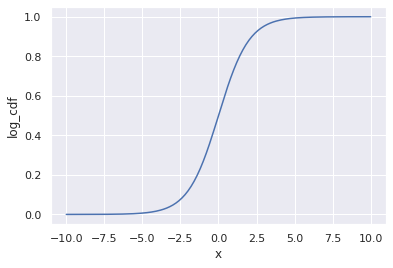

In [15]:
# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)

# Create logistic_dist
logistic_dist = pd.DataFrame({"x": x,
                              "log_cdf": logistic.cdf(x),
                              "log_cdf_man": 1 / (1 + np.exp(-x))})

# Using logistic_dist, plot log_cdf vs. x
sns.lineplot(x='x', y='log_cdf', data=logistic_dist)

# Show the plot
plt.show()

### **Inverse cumulative distribution function**

The logistic function (logistic distribution CDF) has another important property: each x input value is transformed to a unique value. That means that the transformation can be reversed. The logit function is the name for the inverse logistic function, which is also the logistic distribution inverse cumulative distribution function. (All three terms mean exactly the same thing.)

The logit function takes values between zero and one, and returns values between minus infinity and infinity.

* Create `p`, an array of numbers ranging from `0.001` to `0.999` in steps of `0.001`.

* Create the DataFrame `logistic_dist_inv` as a list of dictionaries with the values of `p`, the `p` values transformed with the logistic distribution inverse CDF (also known as the logit function), and the `p` values manually transformed with the equation $log(\frac{p}{(1 - p)})$.

* Using the `logistic_dist_inv` dataset, plot `logit` versus `p` as a line plot.
 


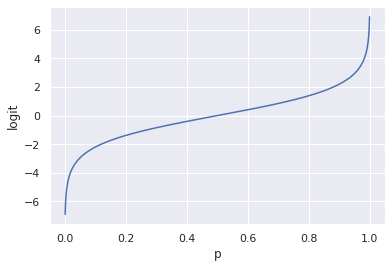

In [16]:
# Create p ranging from 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001, 1, 0.001)

# Create logistic_dist_inv
logistic_dist_inv = pd.DataFrame({"p": p,
                                  "logit": logistic.ppf(p),
                                  "logit_man": np.log(p / (1 - p))})

# Using logistic_dist_inv, plot logit vs. p
sns.lineplot(x='p', y='logit', data=logistic_dist_inv)

# Show the plot
plt.show()

# **Log-likelihood**




In [ ]:
log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)

### ***Logistic regression algorithm***

Let's dig into the internals and implement a logistic regression algorithm. Since **`statsmodels`**'s **`logit()`** function is very complex, you'll stick to implementing simple logistic regression for a single dataset.

Rather than using sum of squares as the metric, we want to use likelihood. However, log-likelihood is more computationally stable, so we'll use that instead. Actually, there is one more change: since we want to maximize log-likelihood, but **`minimize()`** defaults to finding minimum values, it is easier to calculate the ***negative log-likelihood***.

The log-likelihood value for each observation is

$$
log(y_{pred}) * y_{actual} + log(1 - y_{pred}) * (1 - y_{actual})
$$

The metric to calculate is the negative sum of these log-likelihood contributions.

The explanatory values (the `time_since_last_purchase` column of `churn`) are available as `x_actual`. The response values (the `has_churned` column of `churn`) are available as `y_actual`. **`logistic`** is imported from **`scipy.stats`**, and **`logit()`** and **`minimize()`** are also loaded.


* Unpack `coeffs` to `intercept` and `slope`, respectively.
* Calculate the predicted y-values as the `intercept` plus the `slope` times the actual x-values, transformed with the logistic CDF.
* Calculate the log-likelihood as the log of the predicted y-values times the actual y-values, plus the log of one minus the predicted y-values times one minus the actual y-values.
* Calculate the negative sum of the log-likelihood.
* Return the negative sum of the log-likelihood.

In [23]:
x_actual, y_actual = churn['time_since_last_purchase'], churn['has_churned']

# Complete the function
def calc_neg_log_likelihood(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = logistic.cdf(intercept + slope * x_actual)
    # Calculate log-likelihood
    log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
    # Calculate negative sum of log_likelihood
    neg_sum_ll = -np.sum(log_likelihood)
    # Return negative sum of log_likelihood
    return neg_sum_ll

# Test the function with intercept 10 and slope 1
print(calc_neg_log_likelihood([10, 1]))

1997.9624945172732


Minimize the sum of squares metric.

* Use `calc_neg_log_likelihood` as the function to minimize.

* Pass `[0, 0]` as the initial intercept and slope values for the **`minimize()`** function.
* Compare the output with the **`logit()`** call.

In [25]:
from scipy.optimize import minimize

# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_neg_log_likelihood, x0=[0, 0]))

# Compare the output with the logit() call.
print(logit("has_churned ~ time_since_last_purchase", data=churn).fit().params)

      fun: 273.2001452736106
 hess_inv: array([[ 0.01, -0.  ],
       [-0.  ,  0.01]])
      jac: array([-7.63e-06, -3.81e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([-0.04,  0.27])
Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035
time_since_last_purchase    0.269
dtype: float64
